## Business Objective

- I am a store manager, what can I do to enhance my revenue across 100 stores?  

- When I discount some items, will that drive up average sales per basket？

- Some product may have **elasticity of demand**, other product may not (Once I step into the store, I am going to start browsing and I am gonna buying more stuff I probably won't need. So that's what they want, they want to change people's behavior. If you markdown the price of merchandise, it's going to drive up sales of products.) (Percent change in demand is more than percent change in price) 

- Cross-selling: what are the prodcuts that people tend to buy together. Association Rule.  
- Upselling: Salesperson tries to persuade customers to buy a higher-end product, an upgrade or the newest version of an item.

- Shall we markdown? How much shall we markdown? Does it make sense to markdown? Product Category?

<br>

## Process: 
- <a href='#1'>Look At Data First </a>
- <a href='#2'>Exploratory Data Analysis </a>
 - <a href='#3'>Explore cases when Count=0</a>
 - <a href='#4'>Explore cases when Count=-1</a>
 - <a href='#5'>Explore cases when Count=-2</a>
 - <a href='#6'>Delete rows where count$<$0 and don't have corresponded positive sales in the same store</a>
 - <a href='#7'>Check Missing Values</a>
 - <a href='#8'>Explore Outliers</a>
 - <a href='#9'>Average Revenue per Basket</a>
 - <a href='#10'>Price Elasticity of Demand</a>
 - <a href='#11'>Association Analysis</a>
 
 




<br>

## Look at Data First 	<a name='1' />


In [168]:
import pandas as pd
from datetime import datetime

In [169]:
start_time = datetime.now()
data = pd.read_csv('RetailerPromotionStrategy_data.csv')
print datetime.now()-start_time

0:00:01.314451


In [13]:
data.shape

(1048575, 7)

In [14]:
data.head(10)

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
0,A29,11-7270-00007-00057,36,850.0,1.0,3/11/12 00:00,A21773
1,A29,11-7270-00007-00057,39,1500.0,1.0,3/11/12 00:00,A18009
2,A29,11-7270-00007-00057,40,1500.0,1.0,3/11/12 00:00,A25592
3,A29,11-7270-00007-00057,41,1600.0,1.0,3/11/12 00:00,A1449
4,A29,11-7270-00007-00057,42,1600.0,1.0,3/11/12 00:00,A1449
5,A29,11-7270-00007-00057,52,1700.0,1.0,3/11/12 00:00,A12434
6,A29,11-7270-00007-00057,57,1695.0,1.0,3/11/12 00:00,A13081
7,A29,11-7270-00007-00057,58,2095.0,1.0,3/11/12 00:00,A5985
8,A29,11-7270-00007-00057,59,1650.0,1.0,3/11/12 00:00,A21387
9,A29,11-7270-00007-00057,60,1795.0,1.0,3/11/12 00:00,A5987


In [28]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe()

,Line,Sales,Count
count,1048575.000,1048575.000,1048575.000
mean,10.727,1720.513,0.896
std,15.550,3646.003,1.129
min,1.000,-99995.000,-120.000
25%,3.000,395.000,1.000
50%,7.000,1295.000,1.000
75%,14.000,2195.000,1.000
max,823.000,99995.000,120.000


In [37]:
# How many observations in each Line
data['Line'].value_counts()

1      138198
2      103886
3       84615
4       72704
5       63255
6       56578
7       50227
8       45197
9       40427
10      36305
11      32797
12      29470
13      26529
14      23595
15      21240
16      19211
17      17401
18      15649
19      14274
20      12758
21      11479
22      10460
23       9544
24       8744
25       7832
26       7065
27       6486
28       6029
29       5405
30       4995
        ...  
285         1
796         1
236         1
748         1
750         1
239         1
240         1
754         1
755         1
756         1
246         1
758         1
760         1
763         1
764         1
765         1
256         1
265         1
267         1
268         1
269         1
270         1
272         1
277         1
278         1
279         1
280         1
281         1
282         1
182         1
Name: Line, Length: 604, dtype: int64

In [171]:
# How many oberservations in each Count category
data['Count'].value_counts().head(10)

1.000     850239
0.000     171448
-1.000      8577
2.000       5810
10.000      2943
4.000       2471
3.000       1687
6.000       1624
5.000       1271
8.000        356
Name: Count, dtype: int64

In [176]:
data[data['Count']<0].shape

(9349, 7)

<br>

## Exploratory Data Analysis <a name='2'/>

### Explore cases when Count=0 <a name='3' />

In [190]:
data_count0 = data[data['Count']==0]

data_count0.head(3)

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
12,A29,11-7270-00007-00057,63,-786.000,0.000,3/11/12 00:00,A256
14,A29,11-7270-00007-00057,65,-770.000,0.000,3/11/12 00:00,A8481
20,A29,11-7270-00007-00057,75,-500.000,0.000,3/11/12 00:00,A2341


In [192]:
data_count0.Date.value_counts()

3/12/12 00:00    161257
3/11/12 00:00     10191
Name: Date, dtype: int64

In [52]:
# When Count=0, it means it's a discount applied to the purchase
data.loc[(data['SKU']=='A256')&(data['TransactionID']=='11-7270-00007-00057')]

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
11,A29,11-7270-00007-00057,62,2095.000,1.000,3/11/12 00:00,A256
12,A29,11-7270-00007-00057,63,-786.000,0.000,3/11/12 00:00,A256


In [108]:
# Why there are rows where Count=0 but Sales>0?
data.loc[(data['Count']==0)&(data['Sales']>0)].head()

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
1161,A29,11-7270-00007-00110,29,845.000,0.000,3/11/12 00:00,A6007
1234,A29,11-7270-00007-00116,20,234.000,0.000,3/11/12 00:00,A2452
4065,A29,11-7270-00008-00358,6,670.000,0.000,3/11/12 00:00,A13774
5634,A29,11-7270-00014-00241,10,333.000,0.000,3/11/12 00:00,A21307
9361,A29,11-7270-00006-00209,33,475.000,0.000,3/11/12 00:00,A15257


In [113]:
# Select rows where transactionID and SKU match transactionID and SKU when Count=0 but Sales>0
q = '''
    select
        d1.StoreID, d1.TransactionID, d1.Line, d1.Sales, d1.Count, d1.Date, d1.SKU
    from 
        data d1
    inner join
        (select 
            TransactionID, SKU
        from
            data
        where Sales>0 and Count=0) as d2
    on 
        d1.TransactionID = d2.TransactionID and
        d1.SKU = d2.SKU
    '''
data1 = pysqldf(q)

In [116]:
data1.head(10)

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
0,A29,11-7270-00007-00110,22,2195.000,1.000,3/11/12 00:00,A6007
1,A29,11-7270-00007-00110,23,-845.000,0.000,3/11/12 00:00,A6007
2,A29,11-7270-00007-00110,24,2195.000,1.000,3/11/12 00:00,A6007
3,A29,11-7270-00007-00110,25,-845.000,0.000,3/11/12 00:00,A6007
4,A29,11-7270-00007-00110,26,2195.000,1.000,3/11/12 00:00,A6007
5,A29,11-7270-00007-00110,27,-845.000,0.000,3/11/12 00:00,A6007
6,A29,11-7270-00007-00110,28,-2195.000,-1.000,3/11/12 00:00,A6007
7,A29,11-7270-00007-00110,29,845.000,0.000,3/11/12 00:00,A6007
8,A29,11-7270-00007-00116,15,1423.000,1.000,3/11/12 00:00,A2452
9,A29,11-7270-00007-00116,16,-234.000,0.000,3/11/12 00:00,A2452


### We know from the above table: some customers have bought the discounted items but he told the counter cashier that he didn't want this item anymore. In order to not include the discount from that item, we have to add that discount back. 

<br><br>

### Explore cases when Count=-1  <a name='4' />

In [66]:
# Count=-1
data.loc[data['Count']==-1].head()

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
100,A29,11-7270-00007-00066,5,-2013.000,-1.000,3/11/12 00:00,A2729
354,A19,11-7287-00025-00075,4,-1721.000,-1.000,3/11/12 00:00,A16911
446,A27,11-7069-00020-00010,6,-4252.000,-1.000,3/11/12 00:00,A7293
458,A29,11-7270-00007-00072,37,-2395.000,-1.000,3/11/12 00:00,A19365
622,A29,11-7270-00007-00089,19,-3995.000,-1.000,3/11/12 00:00,A21166


In [87]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [119]:
q = '''
    select
        d1.StoreID, d1.TransactionID, d1.Line, d1.Sales, d1.Count, d1.Date, d1.SKU
    from 
        data d1
    inner join
        (select 
            TransactionID, SKU
        from
            data
        where Count=-1) as d2
    on 
        d1.TransactionID = d2.TransactionID and
        d1.SKU = d2.SKU
    '''
data2 = pysqldf(q)

In [120]:
data2.head(20)

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
0,A29,11-7270-00007-00066,3,2013.000,1.000,3/11/12 00:00,A2729
1,A29,11-7270-00007-00066,4,2013.000,1.000,3/11/12 00:00,A2729
2,A29,11-7270-00007-00066,5,-2013.000,-1.000,3/11/12 00:00,A2729
3,A19,11-7287-00025-00075,3,1721.000,1.000,3/11/12 00:00,A16911
4,A19,11-7287-00025-00075,4,-1721.000,-1.000,3/11/12 00:00,A16911
5,A27,11-7069-00020-00010,1,4252.000,1.000,3/11/12 00:00,A7293
6,A27,11-7069-00020-00010,6,-4252.000,-1.000,3/11/12 00:00,A7293
7,A29,11-7270-00007-00072,33,2395.000,1.000,3/11/12 00:00,A19365
8,A29,11-7270-00007-00072,35,2395.000,1.000,3/11/12 00:00,A19365
9,A29,11-7270-00007-00072,36,2395.000,1.000,3/11/12 00:00,A19365


### We can see from the table, what count=-1 means that this customer didn't want this item at all. 
### There are several cases:
###  1. The customer bought just 1 item and he didn't want this item during the  transaction; 
### 2. The customer bought a discouted item and he didn't want this item during the same transaction;
### 3. The customer bought 2 or over 2 items of this product and he didn't want one of this item during the same transaction.
### 4. The customer bought 1 item and he didn't want this item during the transaction, since he found the same item in a cheaper price.
### 5. Cashier wrongly scanned one item twice.

<br><br>

### Explore cases when count=-2  <a name='5' />

In [82]:
# Count=-2
q = '''
    select
        d1.StoreID, d1.TransactionID, d1.Line, d1.Sales, d1.Count, d1.Date, d1.SKU
    from 
        data d1
    inner join
        (select 
            TransactionID, SKU
        from
            data
        where Count=-2) as d2
    on 
        d1.TransactionID = d2.TransactionID and
        d1.SKU = d2.SKU
    '''
data3 = pysqldf(q)

In [87]:
data3.head(20)

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
0,A17,11-7720-00017-00144,6,1600.000,2.000,3/11/12 00:00,A5678
1,A17,11-7720-00017-00144,7,-1600.000,-2.000,3/11/12 00:00,A5678
2,A19,11-7287-00024-00014,9,1400.000,2.000,3/11/12 00:00,A6653
3,A19,11-7287-00024-00014,10,-1400.000,-2.000,3/11/12 00:00,A6653
4,A29,11-7270-00012-00113,2,-17990.000,-2.000,3/11/12 00:00,A22728
5,A29,11-7270-00012-00113,3,11495.000,1.000,3/11/12 00:00,A22882
6,A29,11-7270-00012-00113,4,11495.000,1.000,3/11/12 00:00,A22882
7,A29,11-7270-00012-00113,6,-22990.000,-2.000,3/11/12 00:00,A22882
8,A29,11-7270-00012-00113,7,17990.000,2.000,3/11/12 00:00,A22882
9,A29,11-7270-00018-00076,1,2800.000,2.000,3/11/12 00:00,A1891


In [101]:
# Missing corresponded positive sales
data.loc[(data['SKU']=='A22728')]

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
5003,A29,11-7270-00012-00113,2,-17990.000,-2.000,3/11/12 00:00,A22728
223347,A15,12-7054-00006-00199,7,11495.000,1.000,3/12/12 00:00,A22728
604225,A43,12-7285-00006-00058,5,11495.000,1.000,3/12/12 00:00,A22728


In [99]:
# The cutomer returned the items in another transaction
data.loc[(data['SKU']=='A11920')&(data['StoreID']=='A65')]

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
17859,A65,11-3571-00002-00340,1,9995.000,1.000,3/11/12 00:00,A11920
20424,A65,11-3571-00001-00209,1,9995.000,1.000,3/11/12 00:00,A11920
20425,A65,11-3571-00001-00209,2,9995.000,1.000,3/11/12 00:00,A11920
23312,A65,11-3571-00008-00008,2,-19990.000,-2.000,3/11/12 00:00,A11920
814110,A65,12-3572-00001-00226,1,9995.000,1.000,3/12/12 00:00,A11920


### Several Cases:
### 1. Customers bought 2 or over 2 items of a product and didn't want 2 of them immediately.
### 2. Customers bought 2 or over 2 items of a product and decided to return items after the transaction.
### 3. Missing Records: There are some obervations only indicate they didn't want to buy them, but no observations indicate they already have bought them (when count is positive)

<br><br>

### Delete rows where count$<$0 and don't have corresponded positive sales in the same store  <a name='6' />

In [221]:
data = pd.read_csv('RetailerPromotionStrategy_data.csv')

In [222]:
data_count_less0 = data[data['Count']<0]

In [223]:
q = '''
    select
        a.StoreID, a.TransactionID, a.Line, a.Sales, a.Count, a.Date, a.SKU
    from
        data a 
    join
        data_count_less0 b
    on a.StoreID=b.StoreID and a.SKU=b.SKU
    where
        a.Count>0
    '''
data4 = pysqldf(q)

In [224]:
data4.head()

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
0,A29,11-7270-00007-00057,76,1600.000,1.000,3/11/12 00:00,A18872
1,A29,11-7270-00007-00060,8,1875.000,1.000,3/11/12 00:00,A15257
2,A29,11-7270-00007-00060,8,1875.000,1.000,3/11/12 00:00,A15257
3,A29,11-7270-00007-00060,10,1875.000,1.000,3/11/12 00:00,A15257
4,A29,11-7270-00007-00060,10,1875.000,1.000,3/11/12 00:00,A15257


In [225]:
q = '''
    select
        a.StoreID, a.TransactionID, a.Line, a.Sales, a.Count, a.Date, a.SKU
    from
        data_count_less0 a 
    left join
        data4 b
    on a.StoreID=b.StoreID and a.SKU=b.SKU
    where
        b.StoreID is null
    '''
data41 = pysqldf(q)

In [231]:
data41.head(10)

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
0,A29,11-7270-00012-00113,2,-17990.000,-2.000,3/11/12 00:00,A22728
1,A29,11-7270-00012-00206,1,-59900.000,-1.000,3/11/12 00:00,A23383
2,A29,11-7270-00012-00217,1,-19995.000,-1.000,3/11/12 00:00,A11142
3,A29,11-7270-00012-00223,1,-9995.000,-1.000,3/11/12 00:00,A6708
4,A29,11-7270-00012-00031,2,-19995.000,-1.000,3/11/12 00:00,A15824
5,A29,11-7270-00012-00036,1,-29995.000,-1.000,3/11/12 00:00,A3472
6,A29,11-7270-00012-00056,2,-17995.000,-1.000,3/11/12 00:00,A7086
7,A29,11-7270-00012-00103,1,-5000.000,-1.000,3/11/12 00:00,A23875
8,A29,11-7270-00012-00107,1,-6900.000,-1.000,3/11/12 00:00,A13793
9,A65,11-3571-00008-00016,1,-1.499,-1.000,3/11/12 00:00,A20450


In [227]:
data41.shape

(1101, 7)

In [239]:
# Select StoreID and SKU where only have Count=0 or Count<0
q= '''
    select
        a.StoreID, a.SKU
    from
        data a
    inner join
        data41 b
    on 
        a.StoreID=b.StoreID and a.SKU=b.SKU
    where a.Count=0
    '''
data42 = pysqldf(q)

In [241]:
data42.head()

,StoreID,SKU
0,A65,A23424
1,A02,A25059
2,A07,A16430
3,A08,A14828
4,A09,A15118


In [242]:
data[(data['SKU']=='A23424')&(data['StoreID']=='A65')]

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
23364,A65,11-3571-00008-00103,1,0.000,0.000,3/11/12 00:00,A23424
23365,A65,11-3571-00008-00104,1,-6995.000,-1.000,3/11/12 00:00,A23424


In [243]:
q = '''
    select
        a.StoreID, a.TransactionID, a.Line, a.Sales, a.Count, a.Date, a.SKU
    from
        data a 
    left join
        data41 b
    on a.StoreID=b.StoreID and a.SKU=b.SKU
    where
        b.StoreID is null
    '''
data = pysqldf(q)

In [244]:
data.shape

(1047429, 7)

In [307]:
data.to_csv('data.csv', sep=',',index=False)  

<br><br>

### Check Missing Values <a name='7' />

In [245]:
data.isnull().sum()

StoreID          0
TransactionID    0
Line             0
Sales            0
Count            0
Date             0
SKU              0
dtype: int64

<br><br>

### Explore Outliers <a name='8' />

In [246]:
data.describe()

,Line,Sales,Count
count,1047429.000,1047429.000,1047429.000
mean,10.737,1735.041,0.898
std,15.556,3600.765,1.128
min,1.000,-99995.000,-120.000
25%,3.000,395.000,1.000
50%,7.000,1295.000,1.000
75%,14.000,2195.000,1.000
max,823.000,99995.000,120.000


In [247]:
import numpy as np
def find_outliers_tukey(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

In [248]:
np.set_printoptions(formatter={'float_kind':lambda x: "%.2f" % x})
outlier_var = ['Line','Sales','Count']
for x in outlier_var:
    tukey_indices, tukey_values = find_outliers_tukey(data[x])
    a = np.sort(tukey_values)
    print "Feature '{0}' first and last 10 outliers：{1}{2}\n".format(x,np.unique(a)[:10],np.unique(a)[-10:])
    print "Number of outliers: {0}\n".format(len(tukey_values))

Feature 'Line' first and last 10 outliers：[31 32 33 34 35 36 37 38 39 40][796 797 805 806 808 809 811 812 822 823]

Number of outliers: 66220

Feature 'Sales' first and last 10 outliers：[-99995.00 -99900.00 -89900.00 -88800.00 -86400.00 -84995.00 -80000.00
 -79950.00 -79900.00 -77970.00][86900.00 88000.00 89900.00 90000.00 92120.00 94900.00 96000.00 99000.00
 99900.00 99995.00]

Number of outliers: 84577

Feature 'Count' first and last 10 outliers：[-120.00 -91.00 -60.00 -54.00 -48.00 -40.00 -39.00 -36.00 -33.00 -32.00][58.00 60.00 65.00 70.00 72.00 80.00 90.00 91.00 99.00 120.00]

Number of outliers: 197190



In [177]:
np.percentile(data['Sales'],99)

14995.0

In [258]:
# Buy 1 and return 1
data[(data['SKU']=='A54') & (data['StoreID']=='A21')]

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
284804,A21,12-7067-00003-00194,9,84995.000,1.000,3/12/12 00:00,A54
284814,A21,12-7067-00003-00194,20,-84995.000,-1.000,3/12/12 00:00,A54


In [262]:
# Abnormal sales
data[(data['SKU']=='A23790') & (data['StoreID']=='A78')]

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
30542,A78,11-5634-00008-00182,8,1.799,1.000,3/11/12 00:00,A23790
30543,A78,11-5634-00008-00182,9,-80000.000,0.000,3/11/12 00:00,A23790
1047271,A78,12-5635-00018-00060,1,1.799,1.000,3/12/12 00:00,A23790
1047272,A78,12-5635-00018-00060,2,-70000.000,0.000,3/12/12 00:00,A23790


In [256]:
# Abnormal sales (2.124 & -86400)
data[(data['SKU']=='A14624') & (data['StoreID']=='A14')]

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
206137,A14,12-7016-00002-00461,3,5900.000,1.000,3/12/12 00:00,A14624
206138,A14,12-7016-00002-00461,4,-2400.000,0.000,3/12/12 00:00,A14624
211937,A14,12-7016-00001-00577,1,5900.000,1.000,3/12/12 00:00,A14624
211938,A14,12-7016-00001-00577,2,-2400.000,0.000,3/12/12 00:00,A14624
211939,A14,12-7016-00001-00577,3,5900.000,1.000,3/12/12 00:00,A14624
211940,A14,12-7016-00001-00577,4,-2400.000,0.000,3/12/12 00:00,A14624
212374,A14,12-7016-00007-00121,2,5900.000,1.000,3/12/12 00:00,A14624
212375,A14,12-7016-00007-00121,3,-2400.000,0.000,3/12/12 00:00,A14624
215494,A14,12-7016-00009-00039,1,2.124,36.000,3/12/12 00:00,A14624
215495,A14,12-7016-00009-00039,2,-86400.000,0.000,3/12/12 00:00,A14624


In [185]:
# Buy discount items and return it and buy fewer discount items in the same transaction
data[(data['SKU']=='A10809') & (data['TransactionID']=='12-7027-00013-00092')]

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
653883,A46,12-7027-00013-00092,3,60000.000,120.000,3/12/12 00:00,A10809
653884,A46,12-7027-00013-00092,4,-18000.000,0.000,3/12/12 00:00,A10809
653885,A46,12-7027-00013-00092,6,-60000.000,-120.000,3/12/12 00:00,A10809
653886,A46,12-7027-00013-00092,7,18000.000,0.000,3/12/12 00:00,A10809
653887,A46,12-7027-00013-00092,8,5000.000,10.000,3/12/12 00:00,A10809
653888,A46,12-7027-00013-00092,9,-1500.000,0.000,3/12/12 00:00,A10809


In [66]:
# Buy two items and return one of it
data.loc[(data['SKU']=='A17041')&(data['TransactionID']=='12-7304-00002-00016')]

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
655356,A47,12-7304-00002-00016,10,89900.000,1.000,3/12/12 00:00,A17041
655357,A47,12-7304-00002-00016,11,89900.000,1.000,3/12/12 00:00,A17041
655358,A47,12-7304-00002-00016,12,-89900.000,-1.000,3/12/12 00:00,A17041


In [179]:
# Return the items in another transaction
data.loc[(data['SKU']=='A24153')&(data['StoreID']=='A67')]

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
835966,A67,12-3097-00003-00143,1,44400.000,1.000,3/12/12 00:00,A24153
842579,A67,12-3097-00005-00019,1,44400.000,1.000,3/12/12 00:00,A24153
842580,A67,12-3097-00005-00019,2,44400.000,1.000,3/12/12 00:00,A24153
842581,A67,12-3097-00005-00019,3,0.000,0.000,3/12/12 00:00,A24153
844638,A67,12-3097-00008-00087,2,-88800.000,-2.000,3/12/12 00:00,A24153


In [185]:
# Check how much the mean changes after we drop the outliers in 'Sales'
data['Sales'].mean()

1720.5125972246444

In [191]:
tukey_indices, tukey_values = find_outliers_tukey(data['Sales'])
data.drop(tukey_indices,inplace=True)

In [193]:
# After Drop
data['Sales'].mean()

1208.8544643218809

### The mean of sales appears to change a lot if we drop those outliers, so we can't treat them as negligible.
### We can't also replace those outliers with 99 percentile value of that feature. Since there are both positive and negative outliers and some absolute value are same, which means it doesn't infulence average revenue.
### And there are near 90K outliers in Sales, it's unrealistic to impute them.

<br><br>

### Average Revenue per Basket <a name='9' />

In [ ]:
data = pd.read_csv('data.csv')

In [301]:
data.head()

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
0,A29,11-7270-00007-00057,36,850.000,1.000,3/11/12 00:00,A21773
1,A29,11-7270-00007-00057,39,1500.000,1.000,3/11/12 00:00,A18009
2,A29,11-7270-00007-00057,40,1500.000,1.000,3/11/12 00:00,A25592
3,A29,11-7270-00007-00057,41,1600.000,1.000,3/11/12 00:00,A1449
4,A29,11-7270-00007-00057,42,1600.000,1.000,3/11/12 00:00,A1449


In [269]:
len(data.TransactionID.unique())

196856

In [270]:
# Select transactions who have discount items and total sales>0
q='''
  select
      a.StoreID,
      a.TransactionID,
      sum(a.Count) as Counts,
      sum(a.Sales) as Total
  from
      data a
  inner join
      (select StoreID, TransactionID
       from data
       where Count=0) b
  on
      a.StoreID=b.StoreID and a.TransactionID=b.TransactionID
  group by
      a.StoreID, 
      a.TransactionID
  having
      Total>0
  '''
data50= pysqldf(q)

In [271]:
data50.head()

,StoreID,TransactionID,Counts,Total
0,A01,12-7149-00001-00004,12.000,6960.000
1,A01,12-7149-00001-00005,144.000,331200.000
2,A01,12-7149-00001-00006,24.000,33420.000
3,A01,12-7149-00001-00013,20.000,39960.000
4,A01,12-7149-00001-00016,4.000,6648.000


In [272]:
# Average sales per basket (there are discount items in transactions)
avg_rev_discount = data50.Total.sum() / data50.TransactionID.size

print 'Average sales per basket for those transactions include discount items is {0}.'.format(avg_rev_discount)

Average sales per basket for those transactions include discount items is 57989.8061771.


In [273]:
# Average sales per basket in different store
avg_rev_discount_store = data50.groupby('StoreID').Total.sum() / data50.groupby('StoreID').TransactionID.size()

In [274]:
# Select transactions which don't have any discount items

q = '''
    select
      t1.StoreID,
      t1.TransactionID,
      sum(t1.Count) as Counts,
      sum(t1.Sales) as Total
    from
    (select
        a.StoreID, a. TransactionID, a.Line, a.Sales, a.Count, a.Date, a.SKU
    from 
        data a
    left join
        data1 b
    on 
        a.StoreID=b.StoreID and a.TransactionID=b.TransactionID
    where
        b.StoreID is null) t1
    group by
      t1.StoreID, 
      t1.TransactionID
    having
      Total>0    
    '''
data51 = pysqldf(q)

In [275]:
data51.head()

,StoreID,TransactionID,Counts,Total
0,A01,12-7149-00001-00002,4.000,6645.000
1,A01,12-7149-00001-00003,1.000,1000.000
2,A01,12-7149-00001-00007,1.000,3300.000
3,A01,12-7149-00001-00008,4.000,3871.000
4,A01,12-7149-00001-00009,7.000,6864.000


In [276]:
len(data50.TransactionID.unique())

61256

In [277]:
len(data51.TransactionID.unique())

130606

In [278]:
# Average sales per basket (there aren't any discount items in transactions)
avg_rev_discount1 = data51.Total.sum() / data51.TransactionID.size

print 'Average sales per basket for those transactions include discount items is {0}.'.format(avg_rev_discount1)

Average sales per basket for those transactions include discount items is 7273.80711912.


In [279]:
# Average sales per basket without discount items in different store
avg_rev_discount_store1 = data51.groupby('StoreID').Total.sum() / data51.groupby('StoreID').TransactionID.size()

In [280]:
# Visualization
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

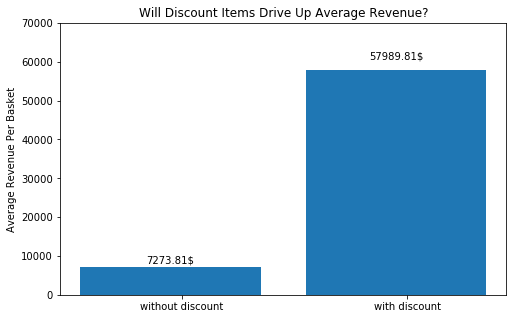

In [286]:
fig, ax = plt.subplots(figsize=(8,5))
x=np.arange(2)
width=0.1
rects1 = ax.bar(x,[avg_rev_discount1,avg_rev_discount])
ax.set_ylabel('Average Revenue Per Basket')
ax.set_ylim(0,70000)
ax.set_title('Will Discount Items Drive Up Average Revenue?')
ax.set_xticks(x+width/2 )
ax.set_xticklabels(('without discount','with discount'))
#annotate
def autolabel(rects):
    for rect in rects:
        height=rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2, 1.035*height, '{:.2f}$'.format(height), ha='center', va='bottom')
autolabel(rects1)

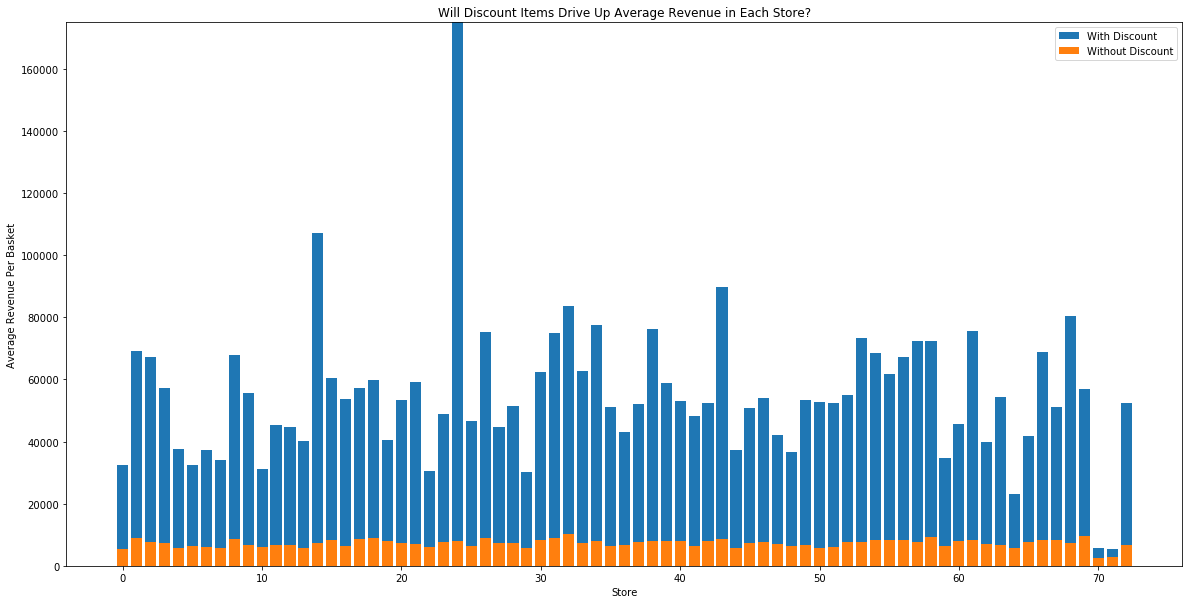

In [287]:
# Visualize average sales per basket in different store
fig, ax = plt.subplots(figsize=(20,10))
x = np.arange(len(avg_rev_discount_store))
width=0.5
rects1 = ax.bar(x,avg_rev_discount_store,width=(x[1]-x[0])*0.8)
ax.set_ylabel('Average Revenue Per Basket')
ax.set_ylim(0,175000)
ax.set_xlabel('Store')
ax.set_title('Will Discount Items Drive Up Average Revenue in Each Store?')

rects2 = ax.bar(x,avg_rev_discount_store1)

ax.legend((rects1[0],rects2[0]),('With Discount','Without Discount'))

### According to above plots, we can conclude that discount items will drive up average sales per basket.

<br><br>

### Price Elasticity of Demand <a name='10' />
#### Percent change in demand / Percnet change in price

In [308]:
data.head()

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
0,A29,11-7270-00007-00057,36,850.000,1.000,3/11/12 00:00,A21773
1,A29,11-7270-00007-00057,39,1500.000,1.000,3/11/12 00:00,A18009
2,A29,11-7270-00007-00057,40,1500.000,1.000,3/11/12 00:00,A25592
3,A29,11-7270-00007-00057,41,1600.000,1.000,3/11/12 00:00,A1449
4,A29,11-7270-00007-00057,42,1600.000,1.000,3/11/12 00:00,A1449


In [288]:
data_count0.Date.value_counts()

3/12/12 00:00    161257
3/11/12 00:00     10191
Name: Date, dtype: int64

In [289]:
data_count0.head()

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
12,A29,11-7270-00007-00057,63,-786.000,0.000,3/11/12 00:00,A256
14,A29,11-7270-00007-00057,65,-770.000,0.000,3/11/12 00:00,A8481
20,A29,11-7270-00007-00057,75,-500.000,0.000,3/11/12 00:00,A2341
34,A29,11-7270-00007-00059,3,-800.000,0.000,3/11/12 00:00,A24593
39,A29,11-7270-00007-00060,9,-475.000,0.000,3/11/12 00:00,A15257


In [349]:
# There are discounts only on 3/11/12 for the item A2341 
data[(data['StoreID']=='A29')&(data['SKU']=='A2341')].head()

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
19,A29,11-7270-00007-00057,74,1000.000,1.000,3/11/12 00:00,A2341
20,A29,11-7270-00007-00057,75,-500.000,0.000,3/11/12 00:00,A2341
191,A29,11-7270-00008-00378,17,1000.000,1.000,3/11/12 00:00,A2341
192,A29,11-7270-00008-00378,18,-500.000,0.000,3/11/12 00:00,A2341
635,A29,11-7270-00007-00090,20,1000.000,1.000,3/11/12 00:00,A2341


In [304]:
print len(data[(data['StoreID']=='A29')&(data['SKU']=='A2341')&(data['Date']=='3/11/12 00:00')&(data['Count']==0)])
print len(data[(data['StoreID']=='A29')&(data['SKU']=='A2341')&(data['Date']=='3/12/12 00:00')&(data['Count']==1)])
print len(data[(data['StoreID']=='A29')&(data['SKU']=='A2341')&(data['Date']=='3/12/12 00:00')&(data['Count']==0)])

81
39
0


### For Store A29 and SKU A2341:
### Price on 3/11/12 is 600\$/item, price on 3/12/12 is 1100\$/item, percent change in price: 500/600=83.3%
### Demand on 3/11/12 is 81 items, demand on 3/12/12 is 39 items, percent change in demand: 42/81=51.85%
### Elasticity of Demand is: 51/85% / 83.3% = 0.62, which means that item A2341 in store A29 is inelastic.

In [299]:
# There are discounts on 3/11/12 and 3/12/12 for the item A24593 
data[(data['StoreID']=='A29')&(data['SKU']=='A24593')]

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
33,A29,11-7270-00007-00059,2,2095.000,1.000,3/11/12 00:00,A24593
34,A29,11-7270-00007-00059,3,-800.000,0.000,3/11/12 00:00,A24593
2998,A29,11-7270-00007-00197,52,2095.000,1.000,3/11/12 00:00,A24593
2999,A29,11-7270-00007-00197,53,-800.000,0.000,3/11/12 00:00,A24593
400255,A29,12-7271-00006-00221,22,2095.000,1.000,3/12/12 00:00,A24593
400256,A29,12-7271-00006-00221,23,-800.000,0.000,3/12/12 00:00,A24593
405593,A29,12-7271-00007-00159,32,2095.000,1.000,3/12/12 00:00,A24593
405594,A29,12-7271-00007-00159,33,-800.000,0.000,3/12/12 00:00,A24593
406359,A29,12-7271-00005-00199,12,2095.000,1.000,3/12/12 00:00,A24593
406360,A29,12-7271-00005-00199,13,-791.000,0.000,3/12/12 00:00,A24593


In [300]:
print len(data[(data['StoreID']=='A29')&(data['SKU']=='A24593')&(data['Date']=='3/11/12 00:00')&(data['Count']==0)])
print len(data[(data['StoreID']=='A29')&(data['SKU']=='A24593')&(data['Date']=='3/12/12 00:00')&(data['Count']==0)])

2
3


In [385]:
# Select StoreID and SKU where it have discount on both date
q='''
  select
       a.StoreID, a.TransactionID, a.Line, a.Sales, a.Count, a.Date, a.SKU
  from
      (select * from data_count0 where Date='3/11/12 00:00') a
  join
      (select * from data_count0 where Date='3/12/12 00:00') b
  on 
      a.StoreID=b.StoreID and a.SKU=b.SKU
      
  '''
data60= pysqldf(q)

In [386]:
# Select storeID and SKU which have discount only on 1 date
q = '''
    select
       a.StoreID, a.TransactionID, a.Line, a.Sales, a.Count, a.Date, a.SKU
  from
      data_count0 a
  left join
      data60 b
  on 
      a.StoreID=b.StoreID and a.SKU=b.SKU
  where 
      b.StoreID is null
    '''
data61= pysqldf(q)

In [356]:
data61.head()

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
0,A29,11-7270-00007-00057,75,-500.000,0.000,3/11/12 00:00,A2341
1,A29,11-7270-00007-00060,9,-475.000,0.000,3/11/12 00:00,A15257
2,A29,11-7270-00007-00060,11,-475.000,0.000,3/11/12 00:00,A15257
3,A29,11-7270-00007-00060,13,-655.000,0.000,3/11/12 00:00,A7098
4,A29,11-7270-00007-00060,15,-535.000,0.000,3/11/12 00:00,A6920


In [388]:
# Select storeID and SKU which have discount only on 1 date
q = '''
    select
       a.StoreID, a.TransactionID, a.Line, a.Sales, a.Count, a.Date, a.SKU
  from
      data a
  join
     (select distinct StoreID, SKU from data61) b
  on 
      a.StoreID=b.StoreID and a.SKU=b.SKU
  order by
      a.StoreID, a.SKU
    '''
data62= pysqldf(q)

In [389]:
data62.head(15)

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
0,A01,12-7149-00002-00679,6,2095.000,1.000,3/12/12 00:00,A10074
1,A01,12-7149-00002-00679,7,-357.000,0.000,3/12/12 00:00,A10074
2,A01,12-7149-00003-00011,11,2095.000,1.000,3/12/12 00:00,A10074
3,A01,12-7149-00003-00011,12,-436.000,0.000,3/12/12 00:00,A10074
4,A01,12-7149-00002-00234,1,2095.000,1.000,3/12/12 00:00,A1009
5,A01,12-7149-00002-00234,2,-695.000,0.000,3/12/12 00:00,A1009
6,A01,12-7149-00002-00234,3,2095.000,1.000,3/12/12 00:00,A1009
7,A01,12-7149-00002-00234,4,-695.000,0.000,3/12/12 00:00,A1009
8,A01,12-7149-00009-00106,3,2243.000,1.000,3/12/12 00:00,A10142
9,A01,12-7149-00009-00106,4,-493.000,0.000,3/12/12 00:00,A10142


In [392]:
# Select Store and SKU which have discount in 3/12 and also have non-discount in 3/11
q = '''
    select
       a.StoreID, a.TransactionID, a.Line, a.Sales, a.Count, a.Date, a.SKU
  from
      data62 a
  join
     (select distinct StoreID, SKU from data62 where Date='3/12/12 00:00' ) b
  on 
      a.StoreID=b.StoreID and a.SKU=b.SKU
  where 
      Date='3/11/12 00:00'
  order by
      a.StoreID, a.SKU
    '''
data63= pysqldf(q)

In [393]:
data63.head()

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
0,A17,11-7720-00017-00036,1,1495.000,1.000,3/11/12 00:00,A12125
1,A17,11-7720-00016-00003,4,1314.000,1.000,3/11/12 00:00,A16830
2,A17,11-7720-00017-00120,2,1695.000,1.000,3/11/12 00:00,A18258
3,A17,11-7720-00017-00097,1,2195.000,1.000,3/11/12 00:00,A19292
4,A17,11-7720-00017-00104,5,2195.000,1.000,3/11/12 00:00,A19292


In [394]:
# Select Store and SKU which have discount in 3/12 and also have non-discount in 3/11
q = '''
    select
       a.StoreID, a.TransactionID, a.Line, a.Sales, a.Count, a.Date, a.SKU
  from
      data62 a
  join
     (select distinct StoreID, SKU from data63) b
  on 
      a.StoreID=b.StoreID and a.SKU=b.SKU
  order by
      a.StoreID, a.SKU
    '''
data64= pysqldf(q)

In [419]:
data64.head()

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
0,A17,11-7720-00017-00036,1,1495.000,1.000,3/11/12 00:00,A12125
1,A17,12-7721-00002-00029,1,5980.000,4.000,3/12/12 00:00,A12125
2,A17,12-7721-00002-00029,2,-1580.000,0.000,3/12/12 00:00,A12125
3,A17,12-7721-00001-00125,46,1495.000,1.000,3/12/12 00:00,A12125
4,A17,12-7721-00001-00125,47,-395.000,0.000,3/12/12 00:00,A12125


In [412]:
# Calculate Price and Demand in each date
q = '''
    select
        StoreID,
        SKU,
        Date,
        sum(Sales)/sum(Count) as Price,
        sum(Count) as Demand
    from 
        data64
    group by
        StoreID,
        SKU,
        Date
    '''
data65 = pysqldf(q)

In [413]:
data65.head(10)

,StoreID,SKU,Date,Price,Demand
0,A17,A12125,3/11/12 00:00,1495.000,1.000
1,A17,A12125,3/12/12 00:00,1130.385,13.000
2,A17,A16830,3/11/12 00:00,1314.000,1.000
3,A17,A16830,3/12/12 00:00,1200.000,2.000
4,A17,A18258,3/11/12 00:00,1695.000,1.000
5,A17,A18258,3/12/12 00:00,1250.000,19.000
6,A17,A19292,3/11/12 00:00,2195.000,2.000
7,A17,A19292,3/12/12 00:00,2195.000,9.000
8,A17,A21577,3/11/12 00:00,3375.000,3.000
9,A17,A21577,3/12/12 00:00,2921.500,10.000


In [416]:
# Elasticity for Each Product in Each Store
q = '''
    select
        a.StoreID,
        a.SKU,
       (abs(a.Demand-b.Demand)/a.Demand) /(abs(a.Price-b.Price)/a.Price) as Elasticty
    from 
        data65 a
    join
        (select * from data65 where Date='3/12/12 00:00' ) b
    on
        a.StoreID=b.StoreID and a.SKU=b.SKU
    where 
        a.Date='3/11/12 00:00'
    '''
data66 = pysqldf(q)

In [429]:
data66.head(10)

,StoreID,SKU,Elasticty
0,A17,A12125,49.203
1,A17,A16830,11.526
2,A17,A18258,68.562
4,A17,A21577,17.365
5,A17,A2215,20.545
6,A17,A3573,5.167
7,A17,A569,10.273
8,A17,A7880,46.763
9,A19,A1092,123.000
10,A19,A14671,2348.936


### Why Elasticty is Null: there are some cases when count=0, sales also equal to 0, which mean the price doesn't change between two date.

In [424]:
data66 = data66.dropna()

In [425]:
import seaborn as sns

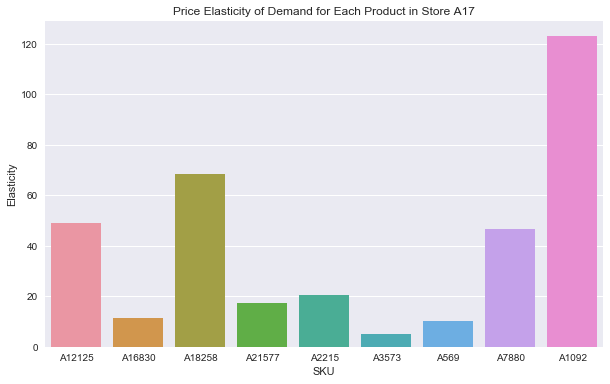

In [435]:
plt.figure(figsize=(10,6))
sns.barplot(x='SKU',y='Elasticty',data=data66[:9])
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Demand for Each Product in Store A17')

<br><br>

### Association Analysis <a name='11' />

In [439]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [440]:
data = pd.read_csv('data.csv')

In [441]:
data.head()

,StoreID,TransactionID,Line,Sales,Count,Date,SKU
0,A29,11-7270-00007-00057,36,850.000,1.000,3/11/12 00:00,A21773
1,A29,11-7270-00007-00057,39,1500.000,1.000,3/11/12 00:00,A18009
2,A29,11-7270-00007-00057,40,1500.000,1.000,3/11/12 00:00,A25592
3,A29,11-7270-00007-00057,41,1600.000,1.000,3/11/12 00:00,A1449
4,A29,11-7270-00007-00057,42,1600.000,1.000,3/11/12 00:00,A1449


In [442]:
# Explore StoreID = A29
basket = data[data['StoreID']=='A29'].groupby(['TransactionID','SKU'])['Count'].sum().unstack().reset_index().fillna(0).set_index('TransactionID')

In [443]:
data[data['StoreID']=='A29'].groupby(['TransactionID','SKU'])['Count'].sum().head(15)

TransactionID        SKU   
11-7270-00005-00002  A5451    1.000
11-7270-00005-00003  A11687   1.000
                     A4654    1.000
11-7270-00005-00004  A13644   1.000
                     A21939   1.000
                     A25955   1.000
                     A43      1.000
                     A4595    1.000
                     A6499    1.000
                     A9562    1.000
11-7270-00005-00005  A2075    1.000
11-7270-00005-00006  A10580   1.000
                     A15652   1.000
11-7270-00005-00007  A11970   1.000
                     A12394   1.000
Name: Count, dtype: float64

In [444]:
basket.head()

SKU,A1,A10004,A10006,A10007,A10008,A10016,A10023,A10024,A10025,A10045,...,A9933,A9938,A9941,A9942,A9946,A9947,A9963,A9964,A9981,A9982
TransactionID,,,,,,,,,,,,,,,,,,,,,
11-7270-00005-00002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
11-7270-00005-00003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
11-7270-00005-00004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
11-7270-00005-00005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
11-7270-00005-00006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [445]:
# Number of Transactions and Products
basket.shape

(4436, 4297)

In [446]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [447]:
frequent_itemsets = apriori(basket_sets, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedants,consequents,support,confidence,lift
0,(A3664),(A20874),0.158,0.054,1.961
1,(A20874),(A3664),0.028,0.309,1.961
2,(A25185),(A2052),0.019,0.314,26.783
3,(A2052),(A25185),0.012,0.519,26.783
4,(A2341),(A3664),0.025,0.277,1.757


In [448]:
basket['A25312'].sum()

280.0

In [449]:
basket['A3664'].sum()

811.0

### For store=A29, rule: A2052-->A25185, 1.2% support means 1.2% proportion of transactions in the dataset contain item A2052 and A25815; 51.9% confidence means 51.9% who buy A2052 will also buy A25185. If the lift is bigger than 1, that lets us know the degree to which the antecedants' occurences are dependent on consequents' occurences. Since lift=26.783, it's pretty big in this case.

### So we conclude item A25185 and A2052 have strong relationship.

<br><br>

In [450]:
# Explore StoreID = A79
basket = data[data['StoreID']=='A79'].groupby(['TransactionID','SKU'])['Count'].sum().unstack().reset_index().fillna(0).set_index('TransactionID')
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedants,consequents,support,confidence,lift
0,(A5483),(A13675),0.011,1.000,51.500
1,(A13675),(A5483),0.019,0.563,51.500
2,(A25312),(A8397),0.064,0.189,6.478
3,(A8397),(A25312),0.029,0.417,6.478
4,(A2854),(A3664),0.058,0.229,1.073


In [451]:
# Number of Transactions and Products
basket.shape

(824, 1628)

In [452]:
print basket['A5483'].sum()

print basket['A13675'].sum()

14.0
25.0


### We can see in Store A79, there are a quite few rules with a high lift value which means that it occurs more frequently than would be expected given the number of transactions and product combinatons. 
### We can see several where the confidence is high as well.
### In looking at above rules, it seems that product A5483 and A13675 are purchased together, product A8397 and A25312 are purchased together.
### We can drive up sales through recommendation from their antecendants.
